In [84]:
import random
import numpy as np
from sklearn.datasets import make_blobs

In [186]:
# load dataset
def data_generate():
    X, Y = make_blobs(n_samples=100, centers=2, random_state=7)
    x_train, y_train = X[:90], Y[:90]
    x_test, y_test = X[90:], Y[90:]
    
    return x_train, y_train, x_test, y_test


# 100 training examples and 10 test examples
x_train, y_train, x_test, y_test = data_generate()

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(90, 2) (90,) (10, 2) (10,)


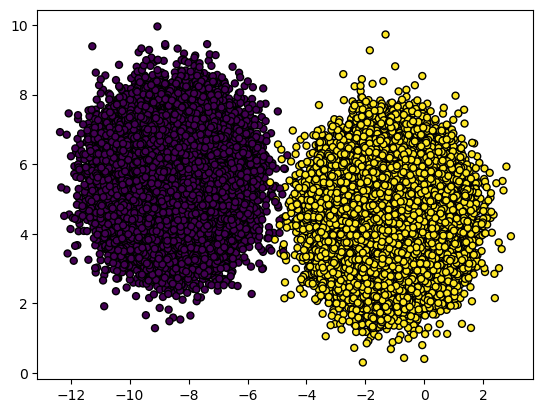

In [180]:
# visualization of the training examples
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x_train[:, 0], x_train[:, 1], marker="o", c=y_train, s=25, edgecolor="k")
plt.scatter(x_test[:, 0], x_test[:, 1], marker="o", c=y_test, s=25, edgecolor="k")
plt.show()

### Q1. KNN Classifier

In [160]:
print(x_train)
y_train

[[ -7.42443766   5.18190153]
 [ -8.37240023   5.85095358]
 [ -2.55645671   5.13450724]
 [ -6.70767333   5.26896209]
 [ -0.27073891   5.03008073]
 [ -1.92840639   5.05227386]
 [ -2.30270788   3.65709498]
 [ -2.78810302   5.22802876]
 [ -7.96853484   5.33701943]
 [-10.53824902   4.93621651]
 [ -1.76266912   3.34734117]
 [ -9.90879768   6.09999997]
 [ -2.17209449   4.33802791]
 [ -9.26275724   5.60044142]
 [ -1.30762924   5.25060537]
 [ -8.71658329   4.14513443]
 [ -1.84873732   4.10702133]
 [ -8.66668967   3.82036299]
 [ -6.82313452   5.75271138]
 [ -1.75278771   4.67902561]
 [ -0.74318996   4.83149356]
 [ -0.59470254   4.59992653]
 [ -2.60167509   5.20045794]
 [ -8.77402795   4.41839375]
 [ -1.50519818   3.64584347]
 [ -9.66742613   4.54835903]
 [ -1.11525543   2.61549769]
 [ -0.02553318   5.44986054]
 [ -0.95837655   3.72023782]
 [ -1.51979924   4.76911191]
 [  0.6282403    2.97202991]
 [ -8.36518584   7.03661537]
 [ -6.56181535   5.83567769]
 [-10.18217342   3.79527719]
 [ -0.14940861

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0])

In [181]:
# KNN classifier
def knn(x, k):
    '''
    Inputs:
    - x: A ndarray of shape (N, D) containing training data; there are N
      training samples each of dimension D.
    - k: the number of nearest neighbors.
    '''
    # TODO:
    # Implement the KNN classifer. 
    # Store the predicted labels in a variable named 'y_pred'.
    ##########################
    # Your Code #
    ##########################
    # Replace "pass" statement with your code
    global x_train, y_train
    
    num_test = x.shape[0]
    
    Ypred = np.zeros(num_test)
    
    v = x_train.shape[0]
    for i in range(num_test):
        distance = []
        for j in range(v):
            distances = np.sqrt(np.sum((x_train[j]-x[i,:])**2))
            distance.append([distances,y_train[j]])
        
        k_possible_results = [distance[1] for distance in sorted(distance)[:k]]
        Ypred[i] = max(set(k_possible_results), key = k_possible_results.count)
#         print(Ypred)
        
    return Ypred

y_pred = knn(x_test,5)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9997
Precision: 0.9997992773986351
Recall: 0.9995986353602248
F1-score: 0.9996989463120924


In [ ]:
### Q2. Linear Classifier
#### a. Complete the implementation of the LinearClassifier class.

In [192]:
# define the LinearClassifier class
class LinearClassifier:
    """An abstarct class for the linear classifiers"""
    def __init__(self, input_dim=2, output_dim=1):
        random.seed(0)
        np.random.seed(0)
        self.W = None
        self.b = None
        self.input_dim = input_dim
        self.output_dim = output_dim
    
    def param_init(self, W=None, b=None):
        if W is not None and W.shape == (self.input_dim, ):
            self.W = W
        else:
            self.W = np.random.randn(self.input_dim)
            
        if b is not None and b.shape == (self.output_dim, ):
            self.b = b
        else:
            self.b = np.random.randn(self.output_dim)
    
    def predict(self, x):
        x = x

        if self.W is None or self.b is None:
            self.param_init()

        # TODO:
        # Implement the predict method.
        # Store the predicted labels in a variable named 'logits'.
        ##########################
        # Your Code #
        ##########################
        # Replace "pass" statement with your code
        print(x,self.W,self.b)
        logits = np.dot(x,self.W)+self.b
        
        print(logits)
x = LinearClassifier()
y_pred = x.predict(x_train)

# print(y_pred,y_test)

# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1-score:", f1)

[[-3.28445088  6.53309911]
 [-1.51292328  2.93320126]
 [-8.4860764   5.52271238]
 [-2.16113919  4.88110039]
 [ 0.48591468  4.01117676]
 [-8.56860966  6.79146177]
 [-8.66986152  5.00760603]
 [-1.14366045  3.13278301]
 [-8.09071236  7.8459709 ]
 [-2.30980027  2.63687759]] [1.76405235 0.40015721] [0.97873798]
[ -2.20093859  -0.51639626 -11.78119183  -0.88041716   3.44101821
 -11.41908561 -12.31152193   0.21486679 -10.15408033  -2.04070502]


#### b. Complete the implementation of the cross entropy loss.

In [ ]:
def cross_entropy_loss(y_pred, y_target):
    # TODO:
    # Implement the cross entropy loss of SVM
    # Store the average loss value in a variable named 'loss'.
    ##########################
    # Your Code #
    ##########################
    # Replace "pass" statement with your code
    pass

#### c. Complete the implementation of the svm hinge loss.

In [ ]:
def svm_loss(y_pred, y_target):

    # TODO:
    # Implement the hinge loss of SVM.
    # Store the average loss value in a variable named 'loss'.
    ##########################
    # Your Code #
    ##########################
    # Replace "pass" statement with your code
    pass

#### d. Try different groups of weight & bias. 

In [ ]:
# define a LinearClassifier object
Linear_Classifier = LinearClassifier(input_dim=x_train.shape[1], output_dim=1)


# TODO: 
# Use the method 'LinearClassifier.param_init()' in utils to parameterize the linear classifier with a group of weight & bias. 
# Use the method 'LinearClassifier.predict()' in utils to get the predicted labels of test examples from the linear classifier. Store the predicted labels in a variable named 'y_pred'.
##########################
# Your Code #
##########################

In [ ]:
# TODO:
# Try different groups of weight & bias to parameterize the linear classifier and espectively get their predictions of test examples.
# Which group is the best? The answer should be based on different evaluation metrics, i.e. cross entropy loss and svm loss. #
# Use the method 'LinearClassifier.predict()' to get the predictions. #
# Use the methods 'cross_entropy_loss()' and 'svm_loss()'. Calculate the loss between the predictions and the targets
##########################
# Your Code #
##########################